In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [46]:
#*** Funções auxiliares para ler imagens do disco e plotar resultados
def readImagesFromDir(imgDirPath):
    fileNames = os.listdir(imgDirPath)
    imagePaths = [os.path.join(imgDirPath,img) for img in fileNames if img[-3:] in ['jpg', 'png']]
    imageList = [load_img(img, target_size=(224, 224)) for img in imagePaths]
    imageList = [img_to_array(img) for img in imageList]
    return imageList, fileNames

# plota as imagens de imgList
def plotImages(imgList):
    for i in range(len(imgList)):
        plotImage(imgList[i])
        
        
def plotImage(img):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)

    ax.imshow(np.uint8(img), interpolation='BICUBIC')
    plt.show()

In [47]:
# Carrega e plota as imagens
imgList, fileNames = readImagesFromDir('../data/interim/')
plotImages(imgList)

Exemplos de parâmetros para data augmentation:
*  rotation_range: faixa de graus para rotações aleatórias;
*  width_shift_range e height_shift_range: fração da largura e algura total;
*  shear_range: ângulo de cisalhamento no sentido anti-horário em graus;
*  zoom_range: intervalo para zoom aleatório;
*  horizontal_flip: inverte aleatoriamente as entradas horizontalmente; e
*  fill_mode: tipo de preenchimento que será realizado fora dos limites de entrada.

In [48]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        zoom_range=0.8,
        fill_mode='wrap') # options avaiable: constant, reflect, wrap, nearest

train_generator = train_datagen.flow_from_directory(
        '../data/interim/',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normaliza os valores dos pixels para o intervalo [0, 1]
    tf.keras.layers.Input(shape=(299, 299, 3)),  # Define a entrada do modelo com tamanho (299, 299, 3)
    # Adicione mais camadas conforme necessário para a construção do seu modelo
])

Found 33125 images belonging to 2 classes.


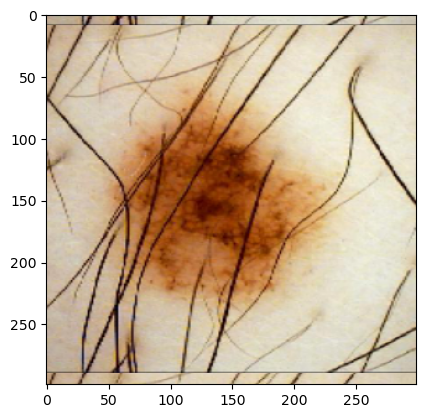

In [49]:
for i in range(1):
    image = train_generator[0][0][0].astype('uint8')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image))
    plt.show()

In [62]:
train_class_weights = dict(enumerate(class_counts))
print(train_class_weights)

{0: 32541, 1: 584}


In [63]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    rescale=1.0/255.0  # Normalize pixel values to [0, 1]
)

train_generator = train_datagen.flow_from_directory(
    'isic2017-train/',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical', 
    shuffle=False
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

validation_generator = test_datagen.flow_from_directory(
    'isic2017-val/',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    'isic2017-test/',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical', 
    shuffle=False
)

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'isic2017-train/'